In [12]:
import keras
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from datetime import datetime
from IPython.display import Image
from IPython.core.display import HTML 

In [13]:
test_df = pd.read_csv('./data/test.csv')
train_df = pd.read_csv('./data/train.csv')

In [14]:
logdir = ".\\logs\\" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

In [32]:
test_df = test_df.drop(['id'], axis=1)
test_df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
test_df.describe()

,id,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,5000.000000,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.00000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.0,5000.000000,5000.0,5000.0,5000.0
mean,2499.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.04780,...,0.191600,0.112600,0.109800,0.078000,0.0,0.0,0.039800,0.0,0.0,0.0
std,1443.520003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.37997,...,6.077753,4.859161,4.766832,4.080104,0.0,0.0,2.814285,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
25%,1249.750000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
50%,2499.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
75%,3749.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
max,4999.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,239.00000,...,255.000000,255.000000,255.000000,255.000000,0.0,0.0,199.000000,0.0,0.0,0.0


In [17]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
Y_train_df = train_df['label']
#Y_train_df = pd.get_dummies(Y_train_df).values
#Y_train_df = Y_train_df.values.reshape(-1, 1)
#Y_train_df = standard_scaler.fit_transform(Y_train_df)
#Y_train_df = keras.utils.np_utils.to_categorical(Y_train_df)
#Y_train_df = Y_train_df.reshape(-1, 10, 1)
Y_train_df.shape

(60000,)

In [19]:
X_train_df = train_df.drop(columns="label")
#X_train_df = standard_scaler.fit_transform(X_train_df)
#X_train_df = keras.utils.np_utils.to_categorical(X_train_df)
X_train_df.shape

(60000, 784)

In [20]:
np.random.seed(7)
# split into 67% for train and 33% for test
X_train, X_valid, y_train, y_valid = train_test_split(X_train_df, Y_train_df, test_size=0.15, random_state=7)

In [22]:
def create_model(train_data):
    # create model
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(800, input_dim=train_data.shape[1], activation='relu'))
    #model.add(keras.layers.Dense(800, activation='relu'))
    model.add(keras.layers.Dropout(0.30))
    model.add(keras.layers.Dense(500, activation='relu'))
    model.add(keras.layers.Dropout(0.30))
    #model.add(keras.layers.Dense(15, activation='relu'))
    model.add(keras.layers.Dense(10))
    model.add(keras.layers.Activation("softmax"))
    # Compile model
    model.compile(optimizer ='sgd', loss = 'sparse_categorical_crossentropy') 
#               metrics =[keras.metrics.mae])
    return model

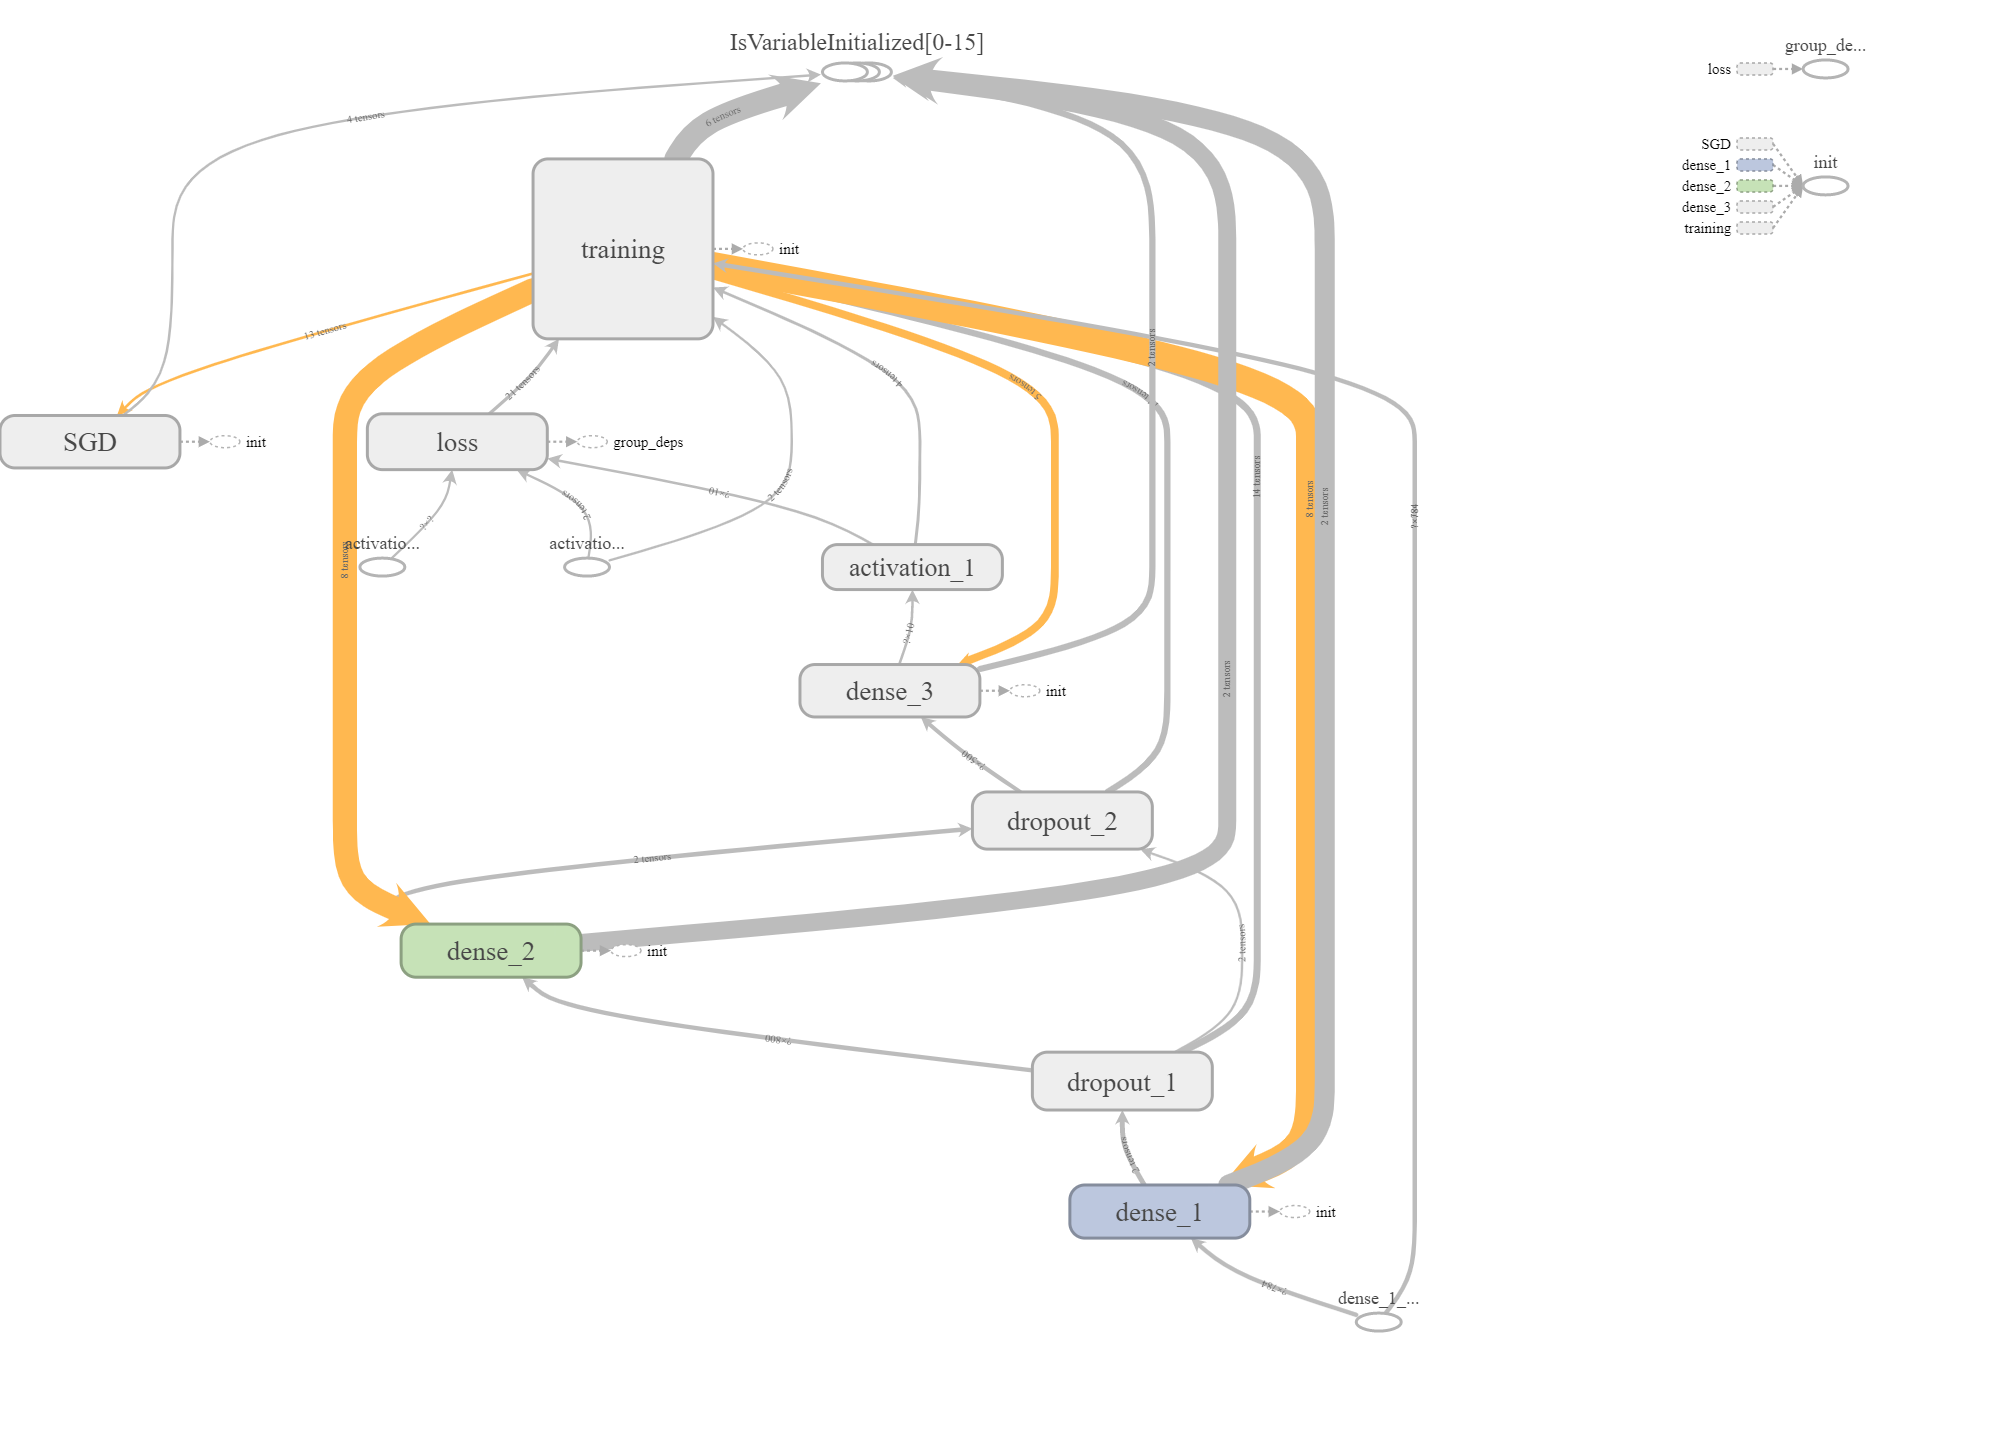

In [23]:
PATH = "G:\\workspace\\kaggles\\notebooks\\Digit_Recognition\\images\\"
Image(filename = PATH + "20191005-132333.png")

In [24]:
model = create_model(X_train_df)

W1025 19:08:28.534212  2456 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1025 19:08:28.538209  2456 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1025 19:08:28.542206  2456 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1025 19:08:28.566191  2456 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W1025 19:08:28.618160  2456 deprecation.py:506] Fr

In [25]:
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid), epochs=50, batch_size=1200, callbacks=[tensorboard_callback])

W1025 19:08:29.706533  2456 deprecation.py:323] From C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 51000 samples, validate on 9000 samples


W1025 19:08:30.063561  2456 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\callbacks.py:850: The name tf.summary.merge_all is deprecated. Please use tf.compat.v1.summary.merge_all instead.

W1025 19:08:30.069559  2456 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\callbacks.py:853: The name tf.summary.FileWriter is deprecated. Please use tf.compat.v1.summary.FileWriter instead.



Epoch 1/50
51000/51000 [==============================] - 15s 300us/step - loss: 6.0455 - val_loss: 2.7810
Epoch 2/50
51000/51000 [==============================] - 15s 301us/step - loss: 2.7920 - val_loss: 2.3685
Epoch 3/50
51000/51000 [==============================] - 18s 355us/step - loss: 2.4840 - val_loss: 2.2190
Epoch 4/50
51000/51000 [==============================] - 17s 335us/step - loss: 2.3501 - val_loss: 2.1133
Epoch 5/50
51000/51000 [==============================] - 21s 408us/step - loss: 2.2550 - val_loss: 2.1061
Epoch 6/50
51000/51000 [==============================] - 34s 661us/step - loss: 2.1875 - val_loss: 2.0762
Epoch 7/50
51000/51000 [==============================] - 27s 524us/step - loss: 2.1269 - val_loss: 2.0612
Epoch 8/50
51000/51000 [==============================] - 21s 406us/step - loss: 2.0853 - val_loss: 2.0105
Epoch 9/50
51000/51000 [==============================] - 27s 531us/step - loss: 2.0656 - val_loss: 1.9970
Epoch 10/50
51000/51000 [============

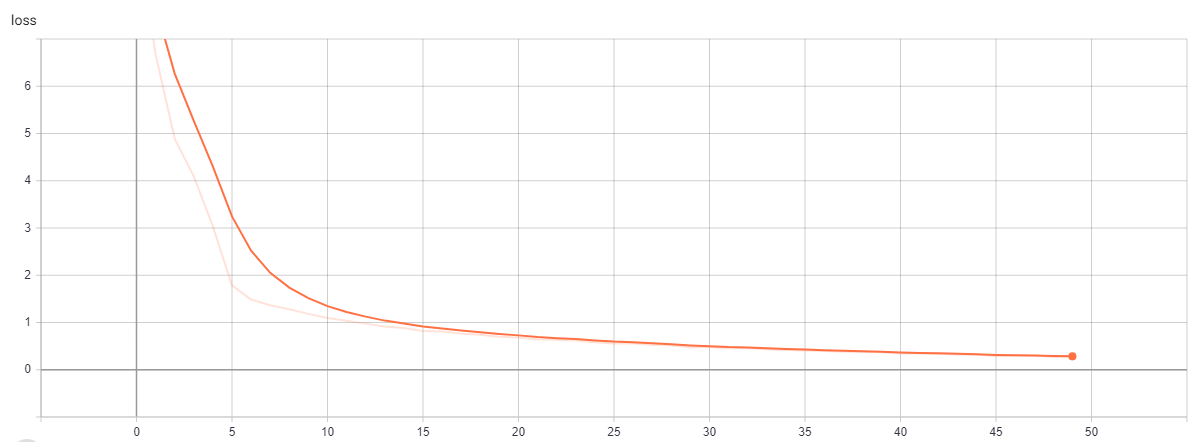

In [27]:
PATH = "G:\\workspace\\kaggles\\notebooks\\Digit_Recognition\\images\\"
Image(filename = PATH + "training_loss.png")

In [33]:
answer = model.predict(test_df)
answer = answer.astype(int)
y = np.argmax(answer, axis=-1)
y

array([3, 0, 2, ..., 1, 6, 3], dtype=int64)

In [34]:
frames_answer = pd.DataFrame({"id": pd.DataFrame(y).index.values,
                             "label": y
                            })
frames_answer

,id,label
0,0,3
1,1,0
2,2,2
3,3,6
4,4,7
5,5,7
6,6,1
7,7,9
8,8,3
9,9,4


In [36]:
frames_answer.to_csv('./submission.csv', index=False)